In [1]:
import numpy as np
import bms_env
import matplotlib.pyplot as plt
from utils import *


In [2]:
bms = bms_env.BMSenv(num_cells= 2, k_tanh_params= [0.8, 2.5], Q_cells = [2.35, 2.35])
print(bms)

BMSenv(num_cells=2,
        k_tanh_params=[0.8 2.5],
        Q_cells=[2.35 2.35],
        MAX_VOLTAGE=4.2,
        MIN_VOLTAGE=2.2,
        INIT_SOC=0.9,
        I_CURRENT=0.22,
        TIMESTEP=0.001,
        w_reward=1.0,
        current_state=[4.19999 4.19999],
        current_soc=[0.86866646 0.89996368])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


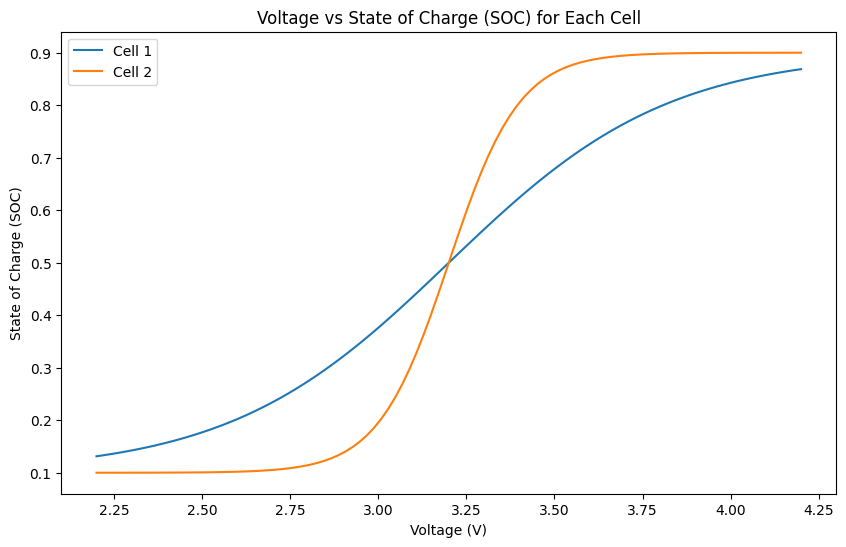

In [3]:
plot_voltage_vs_soc(bms)

In [5]:
T = 10_000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Always disconected (All the batteries stay still)

In [6]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 0
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

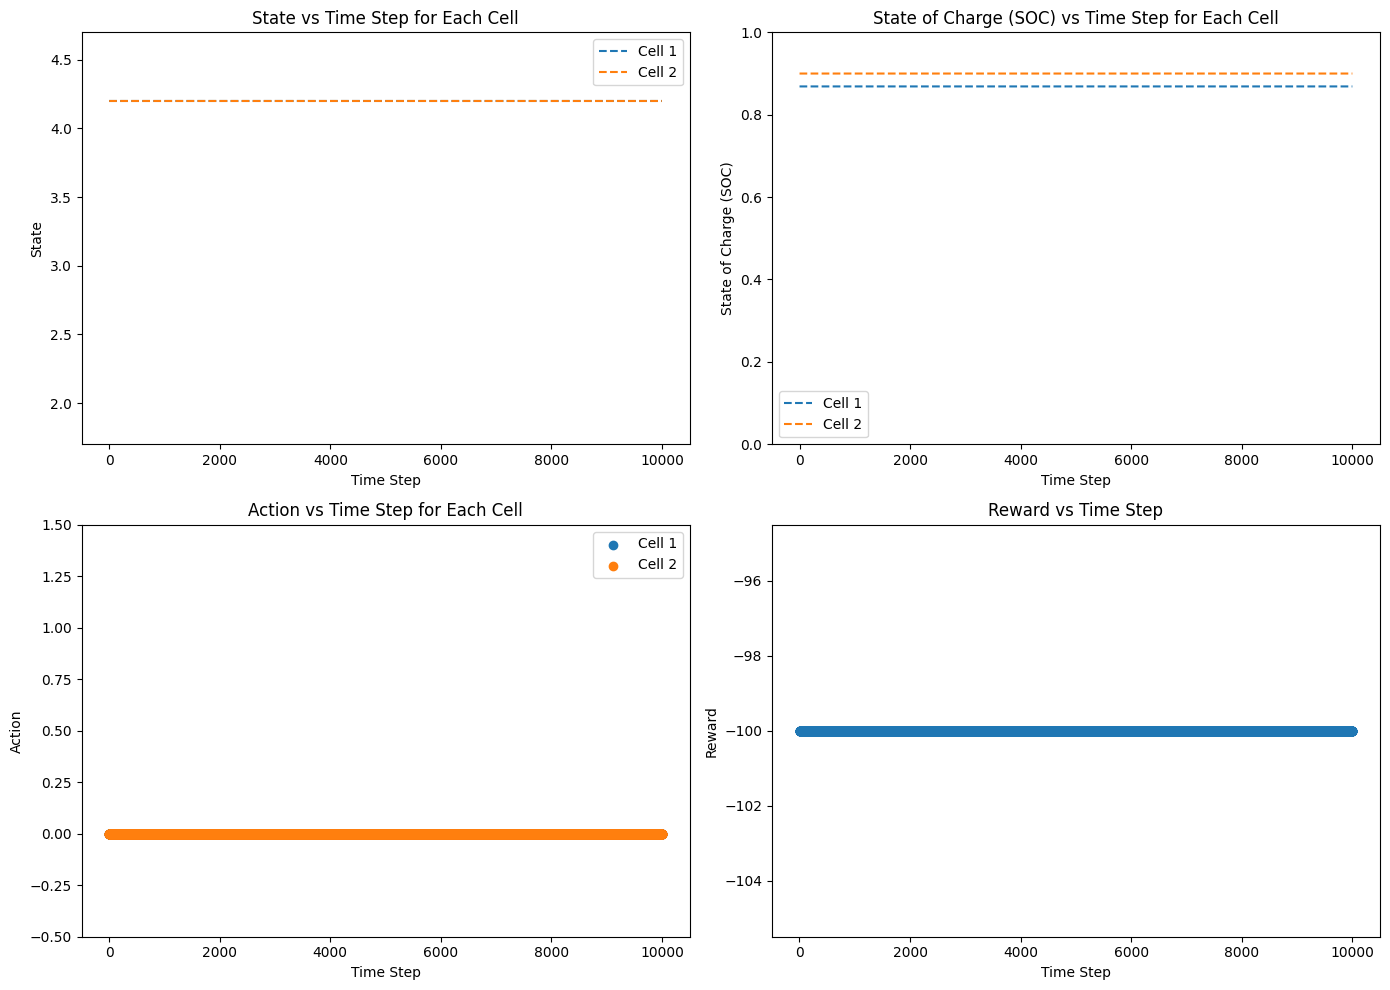

In [7]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Always connected (All the batteries Discharge)

In [8]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 3
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

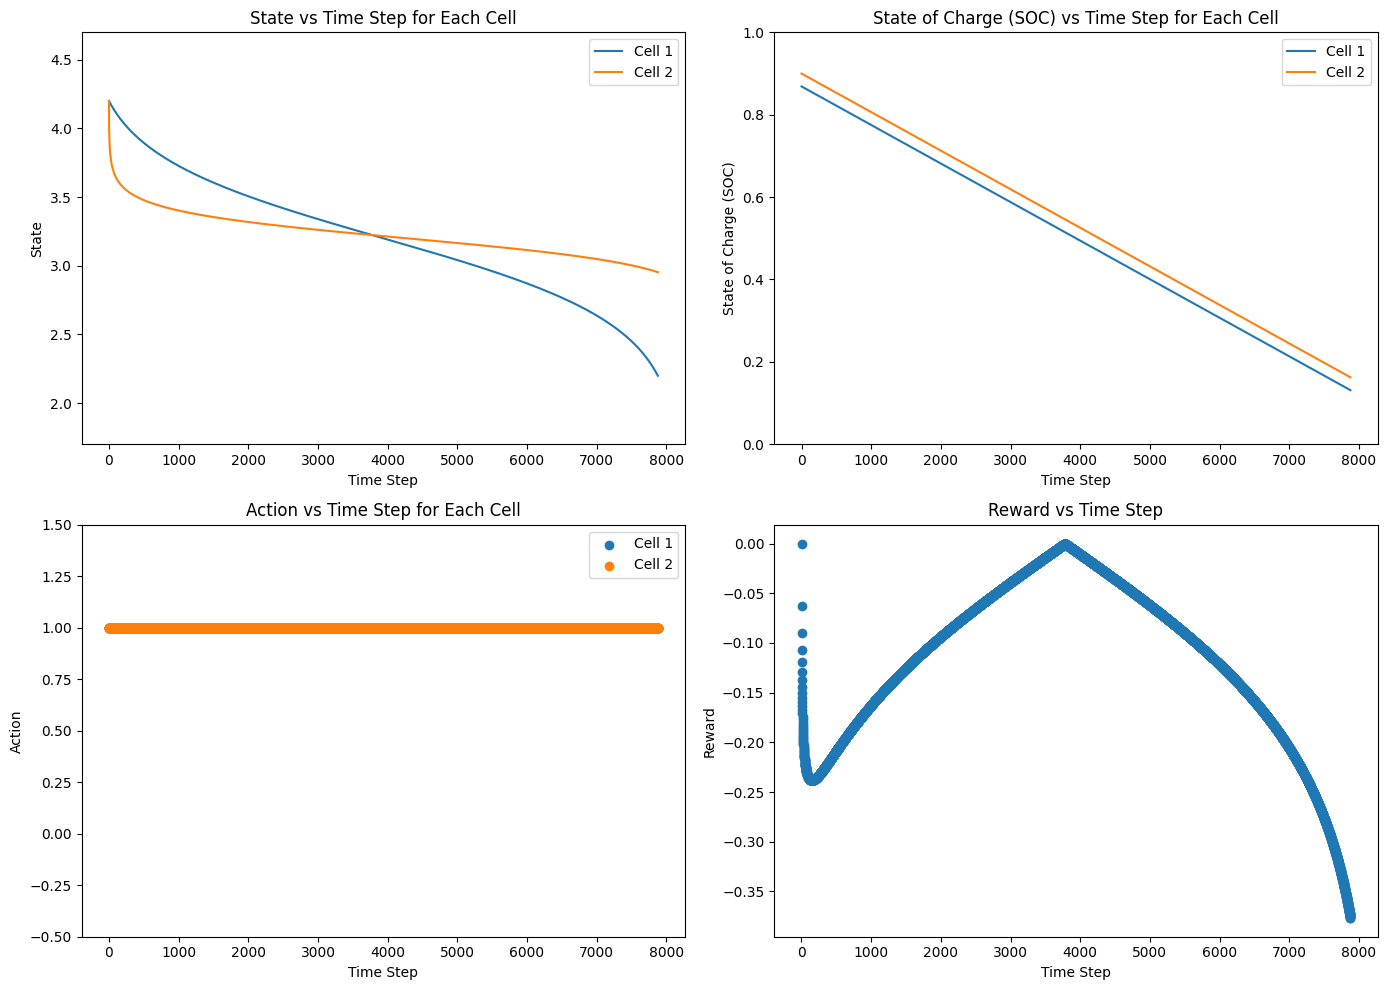

In [9]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 2 always discharging and Cell 1 always disconnected (still)

In [10]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 1
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

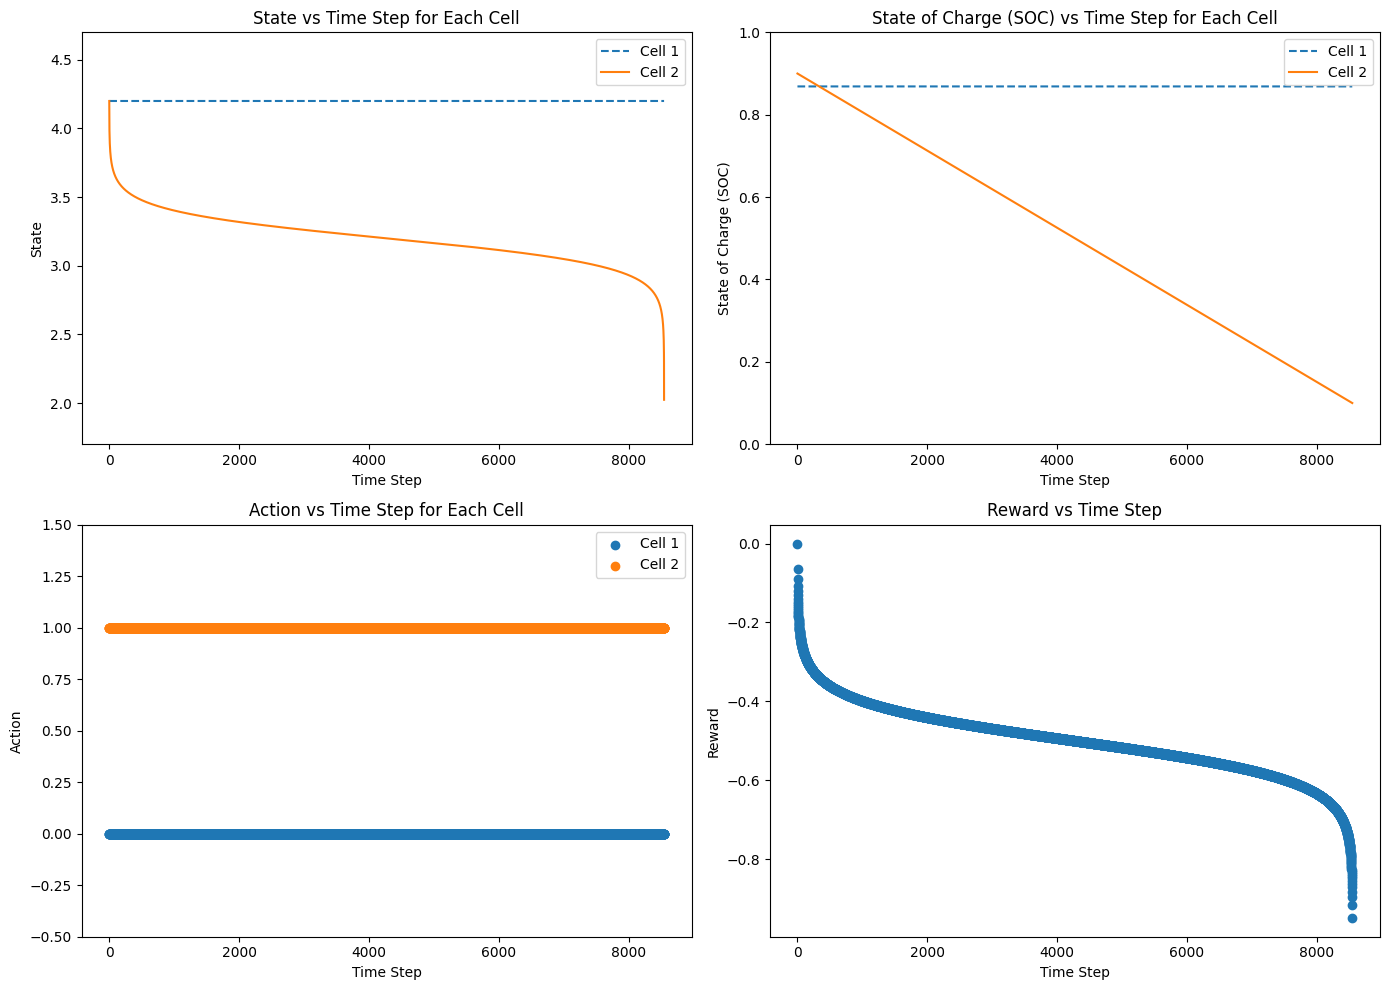

In [11]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 1 always discharging and Cell 2 always disconnected (still)

In [12]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 2
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

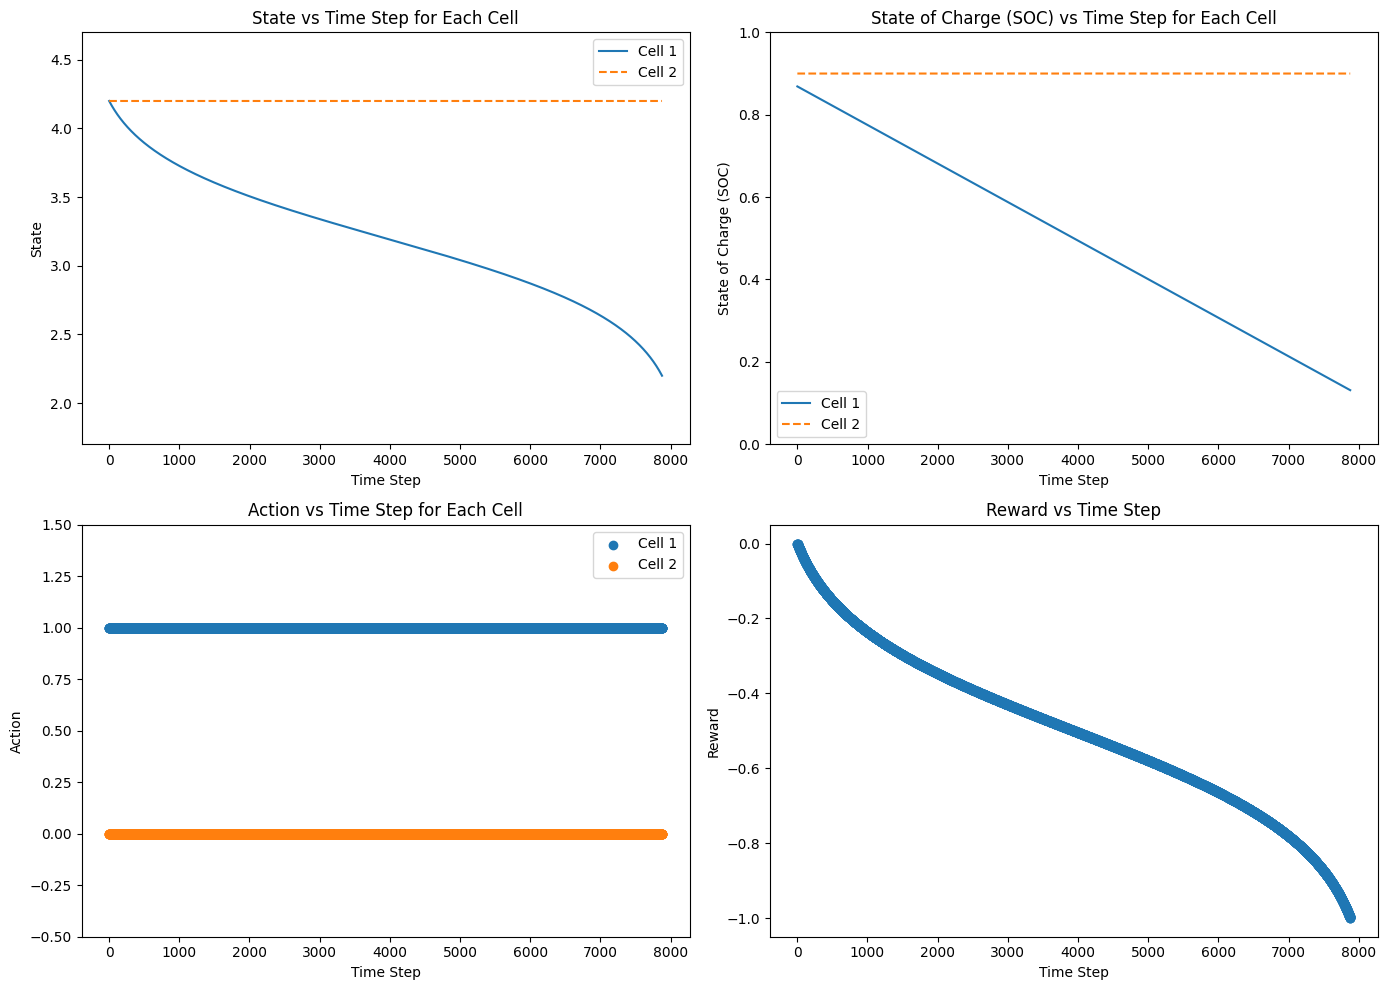

In [13]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Random Controller

In [14]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = bms.action_space.sample()
    while action ==0:
        action = bms.action_space.sample()
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

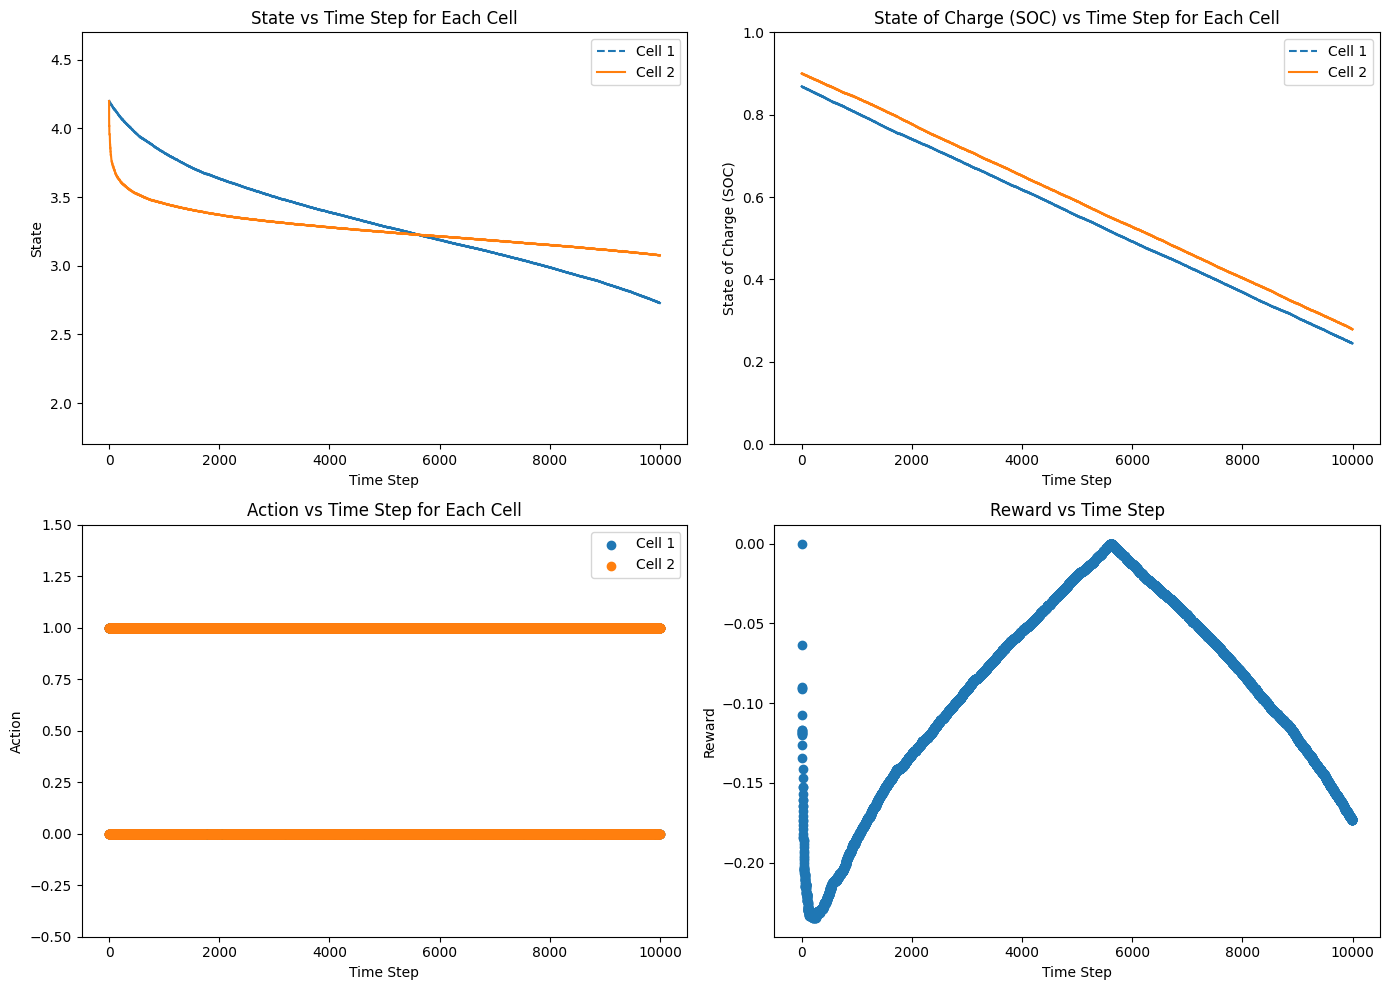

In [15]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

In [16]:
# Define the ranges and densities
start1, end1, num_points1 = 2.2, 2.5, 1
start2, end2, num_points2 = 2.5, 3.5, 6
start3, end3, num_points3 = 3.5, 4.2, 3

# Generate the discrete values for each range
discrete_values1 = np.linspace(start1, end1, num_points1, endpoint=False)
discrete_values2 = np.linspace(start2, end2, num_points2, endpoint=False)
discrete_values3 = np.linspace(start3, end3, num_points3)

# Combine the discrete values
bins = np.concatenate((discrete_values1, discrete_values2, discrete_values3))




In [24]:
bins

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2.2       , 2.5       , 2.66666667, 2.83333333, 3.        ,
       3.16666667, 3.33333333, 3.5       , 3.85      , 4.2       ])

In [46]:
state_count, action_count = (len(bins) - 1)**bms.num_cells, 2**bms.num_cells
state_count, action_count
Q = np.zeros((state_count, action_count))
Q[:, 0] = -100




bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]
random_actions = []


epsilon = 0.1
stepsize = 0.005
gamma = 0.99



while not dones[-1] and len(states) < 2*T:

    state_int  = features_to_unique_integer(states[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions.append(True)
        action = bms.action_space.sample()
        while action ==0:
            action = bms.action_space.sample()
    else:
        random_actions.append(False)
        action = np.argmax(Q[state_int, :])

    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

    if not done:
      next_state_int = features_to_unique_integer(state, bins)

      Q[state_int, action] = Q[state_int, action] + stepsize * (reward + gamma * np.max(Q[next_state_int, :] - Q[state_int, action]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


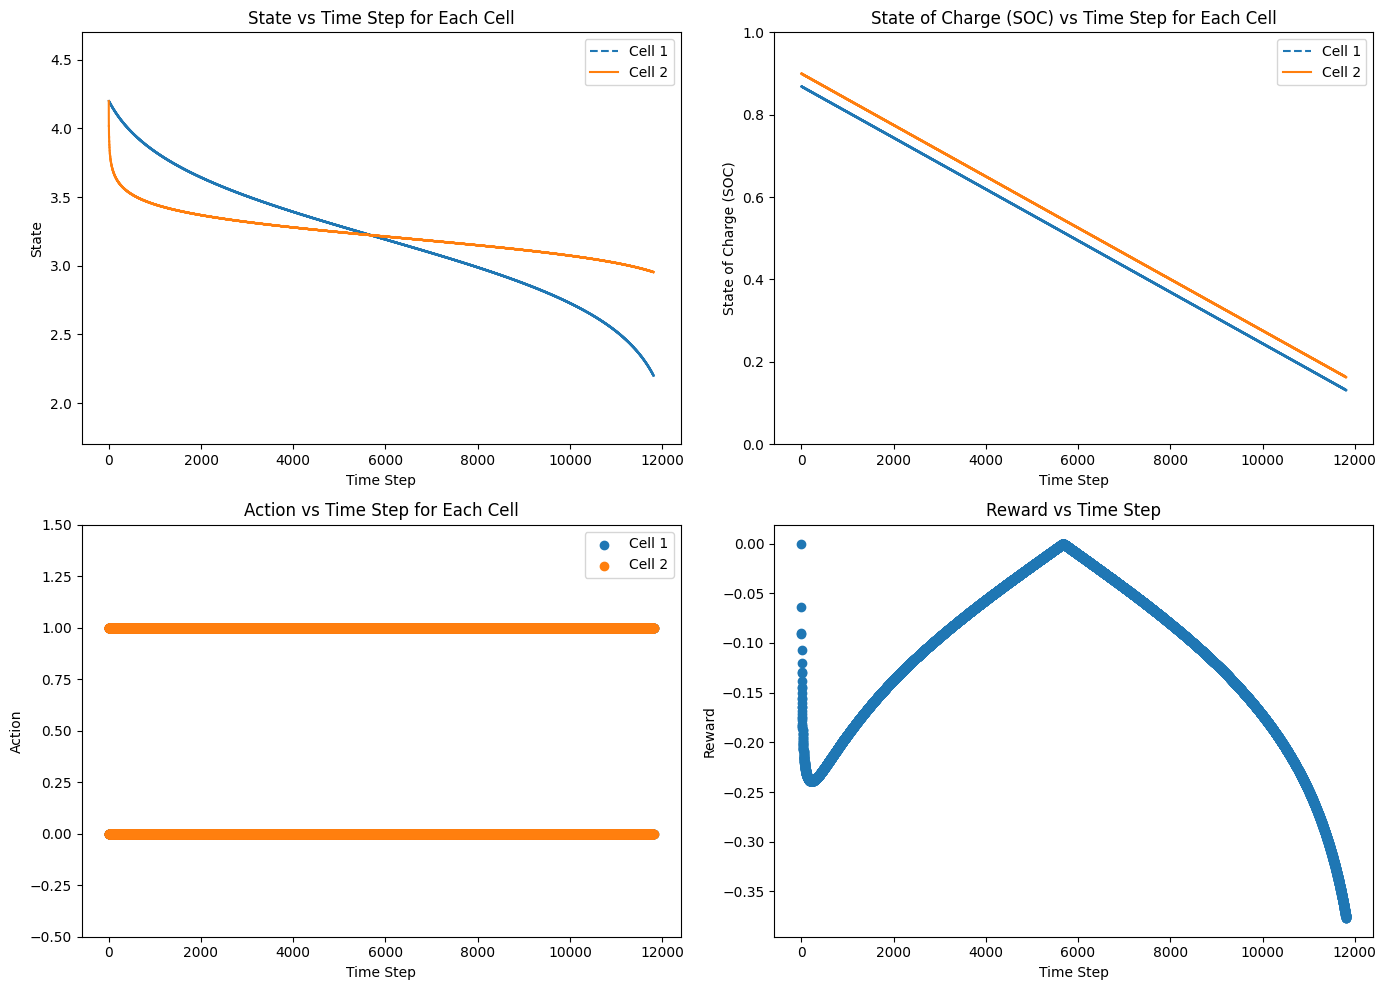

In [47]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

In [48]:
actions[10000: 10020]

[array([1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 1], dtype=int8),
 array([1, 0], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1], dtype=int8)]

In [49]:
random_actions[10000: 10020]

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False]

In [36]:
Q[-1]

array([-1.00000000e+02, -5.85524652e-03, -1.43718469e-03, -2.08952938e-03])

In [34]:
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+02,  0.00000000e+00,  0.00000000e+00,
      